# import libriaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
#mute warnings
%matplotlib inline

#read dataset

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/diabetes/pima indian diebetes 2023.csv')

In [ ]:
df.head()

,n_pregnant,glucose_concentration,blood_pressure_(mm_Hg),skin_thickness_(mm),serum_insulin_(mu_U/ml),BMI,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n_pregnant               768 non-null    int64  
 1   glucose_concentration    768 non-null    int64  
 2   blood_pressure_(mm_Hg)   768 non-null    int64  
 3   skin_thickness_(mm)      768 non-null    int64  
 4   serum_insulin_(mu_U/ml)  768 non-null    int64  
 5   BMI                      768 non-null    float64
 6   pedigree_function        768 non-null    float64
 7   age                      768 non-null    int64  
 8   class                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#display histrograms

array([[<Axes: title={'center': 'n_pregnant'}>,
        <Axes: title={'center': 'glucose_concentration'}>,
        <Axes: title={'center': 'blood_pressure_(mm_Hg)'}>],
       [<Axes: title={'center': 'skin_thickness_(mm)'}>,
        <Axes: title={'center': 'serum_insulin_(mu_U/ml)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'pedigree_function'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

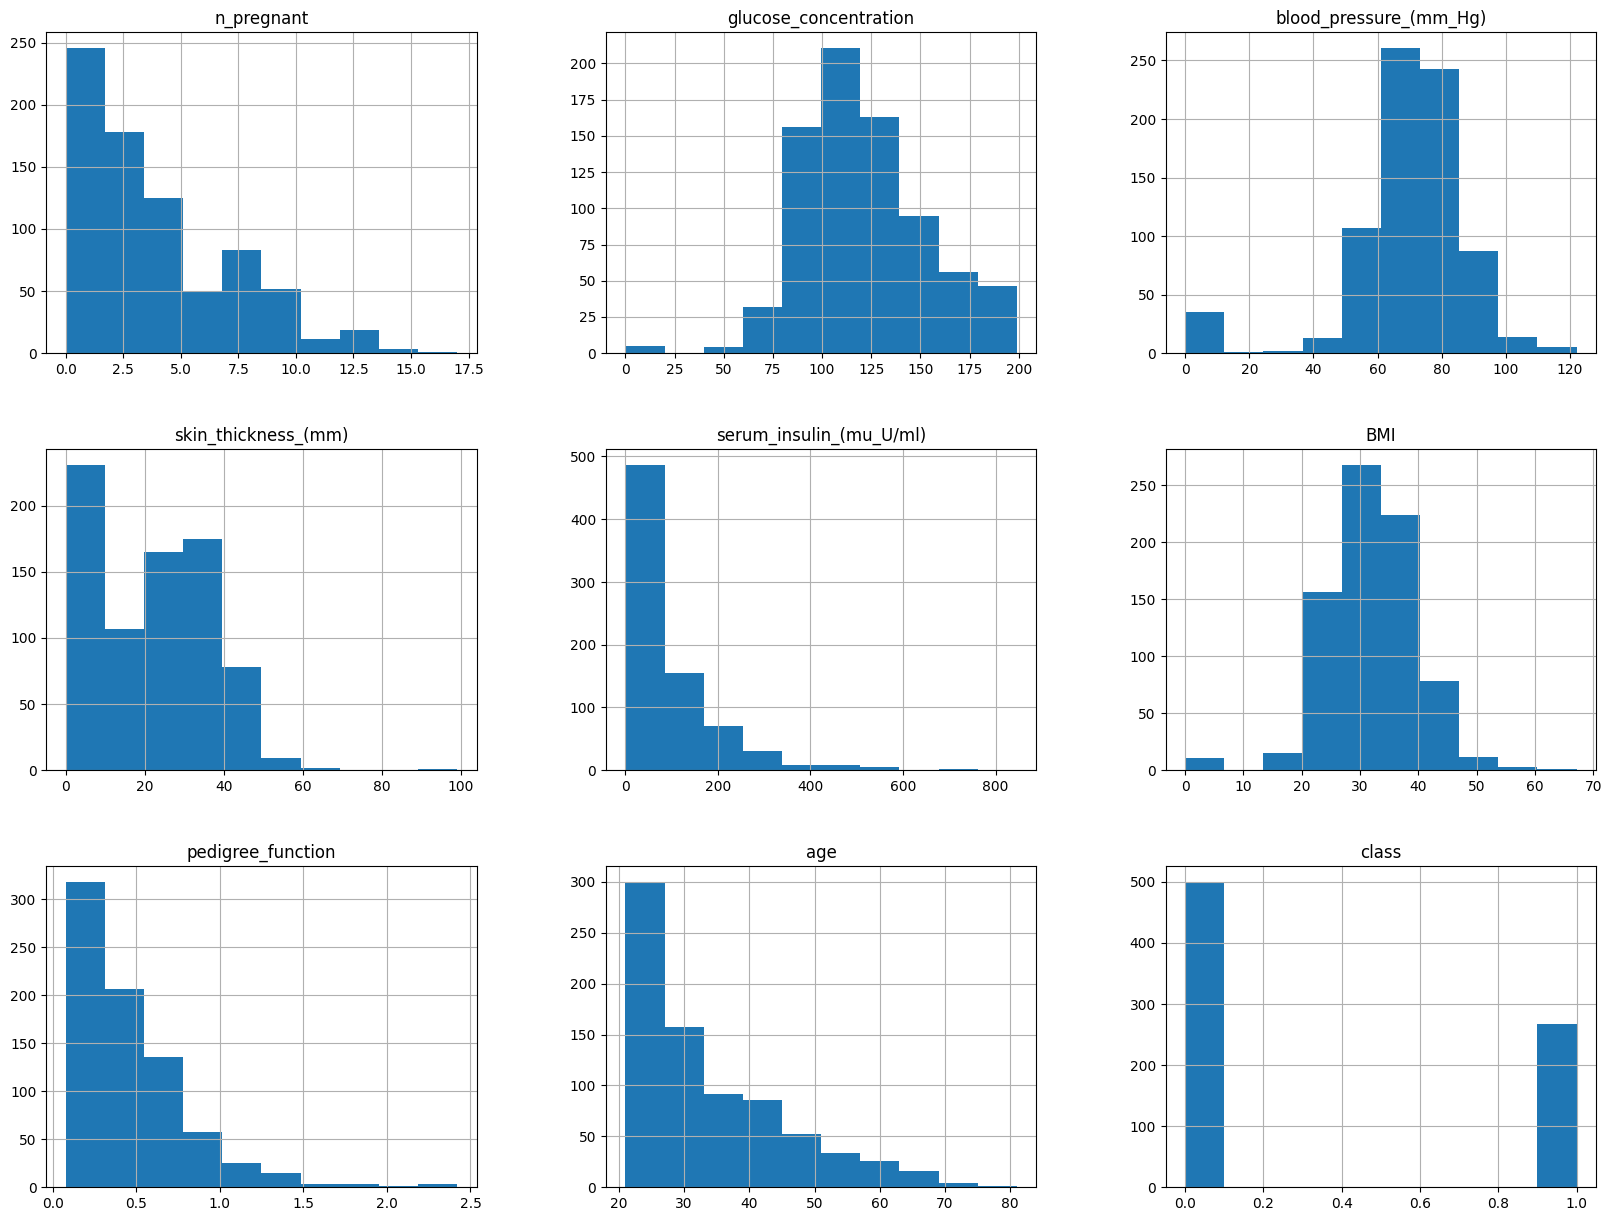

In [ ]:
df.hist(bins=10, figsize=(20,15))

In [ ]:
correlations=df.corr()
correlations

,n_pregnant,glucose_concentration,blood_pressure_(mm_Hg),skin_thickness_(mm),serum_insulin_(mu_U/ml),BMI,pedigree_function,age,class
n_pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_concentration,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure_(mm_Hg),0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness_(mm),-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum_insulin_(mu_U/ml),-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

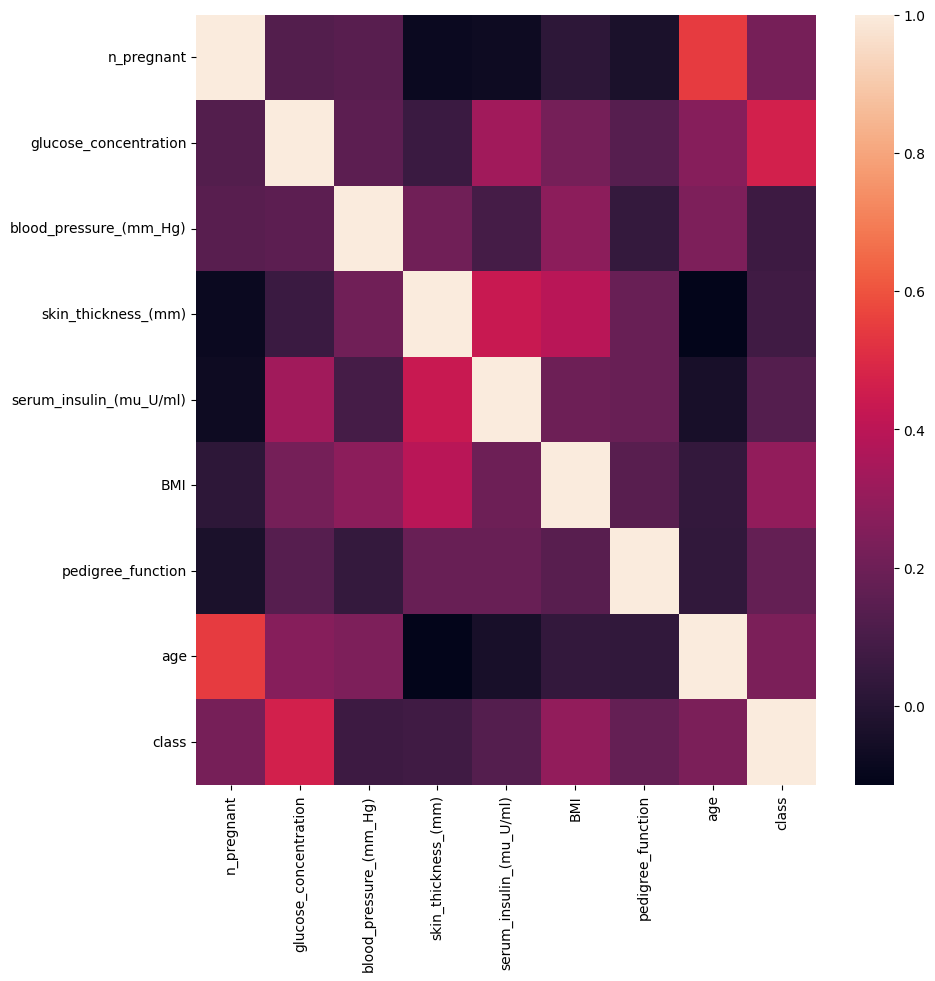

In [ ]:
#Display a heatmap
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(correlations)

In [ ]:
#process null values drop replace mean
df=df.fillna(method='ffill')

#Split data into x and y

In [ ]:
x=df.drop('class', axis=1)
y=df['class']

In [ ]:
#split training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
#standardize data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_prepared=scaler.fit_transform(x_train)
x_test_prepared=scaler.transform(x_test)

log_reg=LogisticRegression(random_state=42)

In [ ]:
#using gridsearch find optimal model

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C': np. logspace (-4, 4, 20),
    'solver' : ['newton-cg', 'Ibfgs', 'liblinear', 'sag', ' saga'],
    'max_iter' : [500, 1000,2500, 3000]
}
]

clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

finetunedmodel = clf.fit(x_train_prepared, y_train)

print('The fine tuned model:',finetunedmodel.best_params_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
The fine tuned model: {'C': 0.615848211066026, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
y_test_pred = finetunedmodel.predict(x_test_prepared)
y_test_prob = finetunedmodel.predict_proba(x_test_prepared)[:,1]

Testing Confusion matrix:
 [[132  14]
 [ 37  48]]


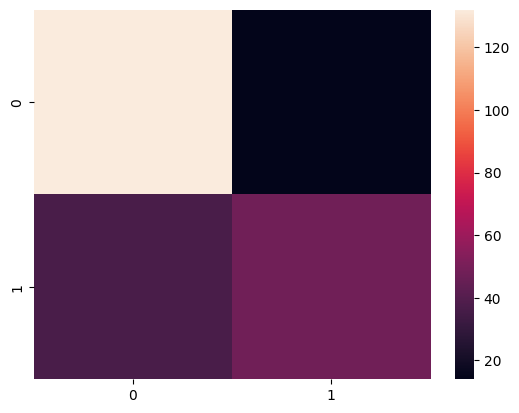


Finetuned Model Performance on Testing dataset
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.56      0.65        85

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231

Testing AUC: 73.4408 %
Testing Accuracy: 77.9221 %
Optimal model's AUC: 73.4408 %


In [ ]:
from sklearn.metrics import confusion_matrix

tst_confusion_mtrx=confusion_matrix(y_test, y_test_pred)
print('Testing Confusion matrix:\n',tst_confusion_mtrx)
sns.heatmap(pd.DataFrame(tst_confusion_mtrx))
plt.show()

from sklearn.metrics import classification_report

print('\nFinetuned Model Performance on Testing dataset')
print(classification_report(y_test, y_test_pred))

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

tst_auc_roc = roc_auc_score(y_test, y_test_pred)*100
tst_Accuracy = accuracy_score(y_test, y_test_pred)*100
print('Testing AUC: %.4f %%' % tst_auc_roc)
print('Testing Accuracy: %.4f %%' % tst_Accuracy)
print('Optimal model\'s AUC: %.4f %%' % tst_auc_roc)